# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

| Variable              | Description                                                       |
|-----------------------|-------------------------------------------------------------------|
| satisfaction_level    | Employee-reported job satisfaction level [0&ndash;1]              |
| last_evaluation       | Score of employee's last performance review [0&ndash;1]           |
| number_project        | Number of projects employee contributes to                        |
| average_monthly_hours | Average number of hours employee worked per month                 |
| time_spend_company    | How long the employee has been with the company (years)           |
| Work_accident         | Whether or not the employee experienced an accident while at work |
| left                  | Whether or not the employee left the company                      |
| promotion_last_5years | Whether or not the employee was promoted in the last 5 years      |
| Department            | The employee's department                                         |
| salary                | The employee's salary (U.S. dollars)                              |

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [16]:
# Import packages

# operational packages
import pandas as pd

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# pickle for saving and loading the model after training
import pickle

# model_selection packages for creating the training set and testing set and searching over hyperparameters of estimators
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# functions for computing model metrics and displaying them
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve, RocCurveDisplay

# xgboost classifier and plot_importance
from xgboost import XGBClassifier
from xgboost import plot_importance



### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [17]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_comma_sep.csv")


# Display first few rows of the dataframe
df0.head(10)



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [18]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [19]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [20]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [21]:
# Rename columns as needed
mapper = {"time_spend_company": "tenure", 
          "Department": "department", 
          "promotion_last_5years": "recently_promoted",
          "satisfaction_level": "satisfaction",
          "Work_accident": "work_accident",
          "number_project": "number_projects",
          "average_montly_hours": "average_monthly_hours"}

df0 = df0.rename(columns=mapper)

# Display all column names after the update
df0.columns


Index(['satisfaction', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'recently_promoted', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [22]:
# Check for missing values
num_missing = df0.isna().sum().sum()
print("Number of missing values: " + str(num_missing))


Number of missing values: 0


### Check duplicates

Check for any duplicate entries in the data.

In [23]:
# Check for duplicates
duplicate_mask = df0.duplicated()
print("Number of duplicate rows: " + str(duplicate_mask.sum()))


Number of duplicate rows: 3008


In [24]:
# Inspect some rows containing duplicates as needed
df0[duplicate_mask].sort_values(by=["satisfaction", "last_evaluation"]).head(10)
# it is worth noting that "df0.duplicated()" by default marks all duplicates as true except the first, 
# therefore this does not display the first occurance of a duplicate.

,satisfaction,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,left,recently_promoted,department,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14863,0.09,0.77,6,290,4,0,1,0,technical,medium
12278,0.09,0.78,6,254,4,0,1,0,support,low
14489,0.09,0.78,6,254,4,0,1,0,support,low
12397,0.09,0.79,6,293,5,0,1,0,sales,low
12477,0.09,0.79,6,275,4,0,1,0,sales,low


In [25]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_dropped_duplicates = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
df_dropped_duplicates.head(10)


,satisfaction,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,left,recently_promoted,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

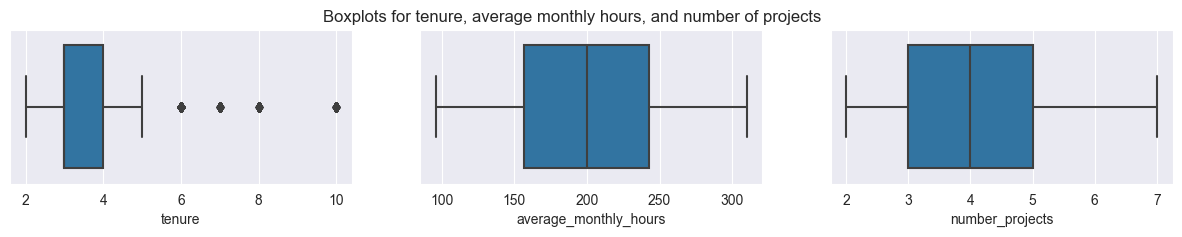

In [26]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for tenure, average monthly hours, and number of projects')
sns.boxplot(ax=axes[0], x=df_dropped_duplicates['tenure'])
sns.boxplot(ax=axes[1], x=df_dropped_duplicates['average_monthly_hours'])
sns.boxplot(ax=axes[2], x=df_dropped_duplicates['number_projects'])
plt.show();



In [27]:
# Determine the number of rows containing outliers
def make_outlier_mask(df, columns):
    outliers = df[columns].copy()

    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        upper_thresh = q3 + 1.5*iqr
        lower_thresh = q1 - 1.5*iqr
        outliers[column] = (df[column] > upper_thresh) | (df[column] < lower_thresh)
    return outliers

outlier_mask = make_outlier_mask(df_dropped_duplicates, ["tenure","average_monthly_hours","number_projects"])

print("Number of rows containing outliers: ")
print(outlier_mask.sum())



Number of rows containing outliers: 
tenure                   824
average_monthly_hours      0
number_projects            0
dtype: int64


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [28]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
num_left_dd = df_dropped_duplicates["left"].sum()
num_stayed_dd = (1-df_dropped_duplicates["left"]).sum()
num_left_kd = df0["left"].sum()
num_stayed_kd = (1-df0["left"]).sum()

print("When dropping duplicates: ")
print("Number of people who left:", num_left_dd)
print("Number of people who stayed:", num_stayed_dd)
print("")
print("When not dropping duplicates: ")
print("Number of people who left:", num_left_kd)
print("Number of people who stayed:", num_stayed_kd)

# Get percentages of people who left vs. stayed
percent_dd = num_left_dd / (num_left_dd + num_stayed_dd)
percent_kd = num_left_kd / (num_left_kd + num_stayed_kd)

print("")
print("Percentage of people who left when dropping duplicates: {:.2f}%".format(percent_dd*100))
print("Percentage of people who left when not dropping duplicates: {:.2f}%".format(percent_kd*100))



When dropping duplicates: 
Number of people who left: 1991
Number of people who stayed: 10000

When not dropping duplicates: 
Number of people who left: 3571
Number of people who stayed: 11428

Percentage of people who left when dropping duplicates: 16.60%
Percentage of people who left when not dropping duplicates: 23.81%


Since the percentage is so much higher when not dropping duplicates, this is evidence that the duplicates may be due to many employees having similar features, rather than rows in the dataset being duplicated (multiple rows for the same employee). Not dropping duplicates may produce better models, especially for models that require a mostly even split between target outcomes.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

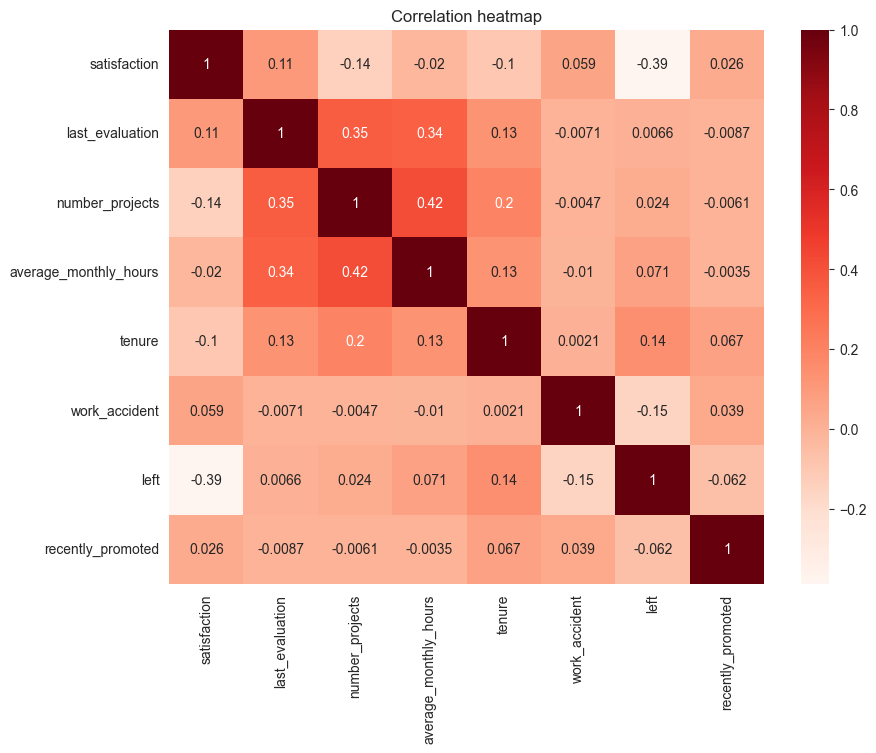

In [29]:
# A correlation heatmap to determine how strongly the variables are correlated with each other.
plt.figure(figsize=[1.5*6.4, 1.5*4.8]) # I needed to increase the default size by 50% so that the numbers are visible
sns.heatmap(df0.corr(method='pearson', numeric_only=True), annot=True, cmap='Reds') 
# numeric_only=True needed in newer versions of pandas
plt.title('Correlation heatmap')
plt.show()

/Users/nolan/Desktop/SalifortMotors/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


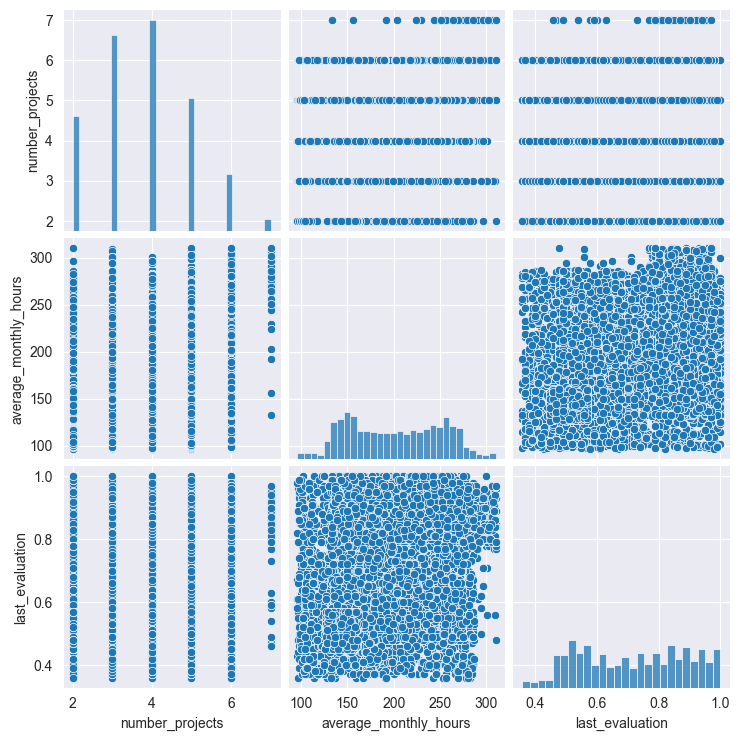

In [30]:
# Visually checking how correlated number_projects, average_monthly_hours, and last_evaluation are
# In the correlation heatmap, they are the most correlated independent variables
sns.pairplot(df0[["number_projects","average_monthly_hours","last_evaluation"]])


/Users/nolan/Desktop/SalifortMotors/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


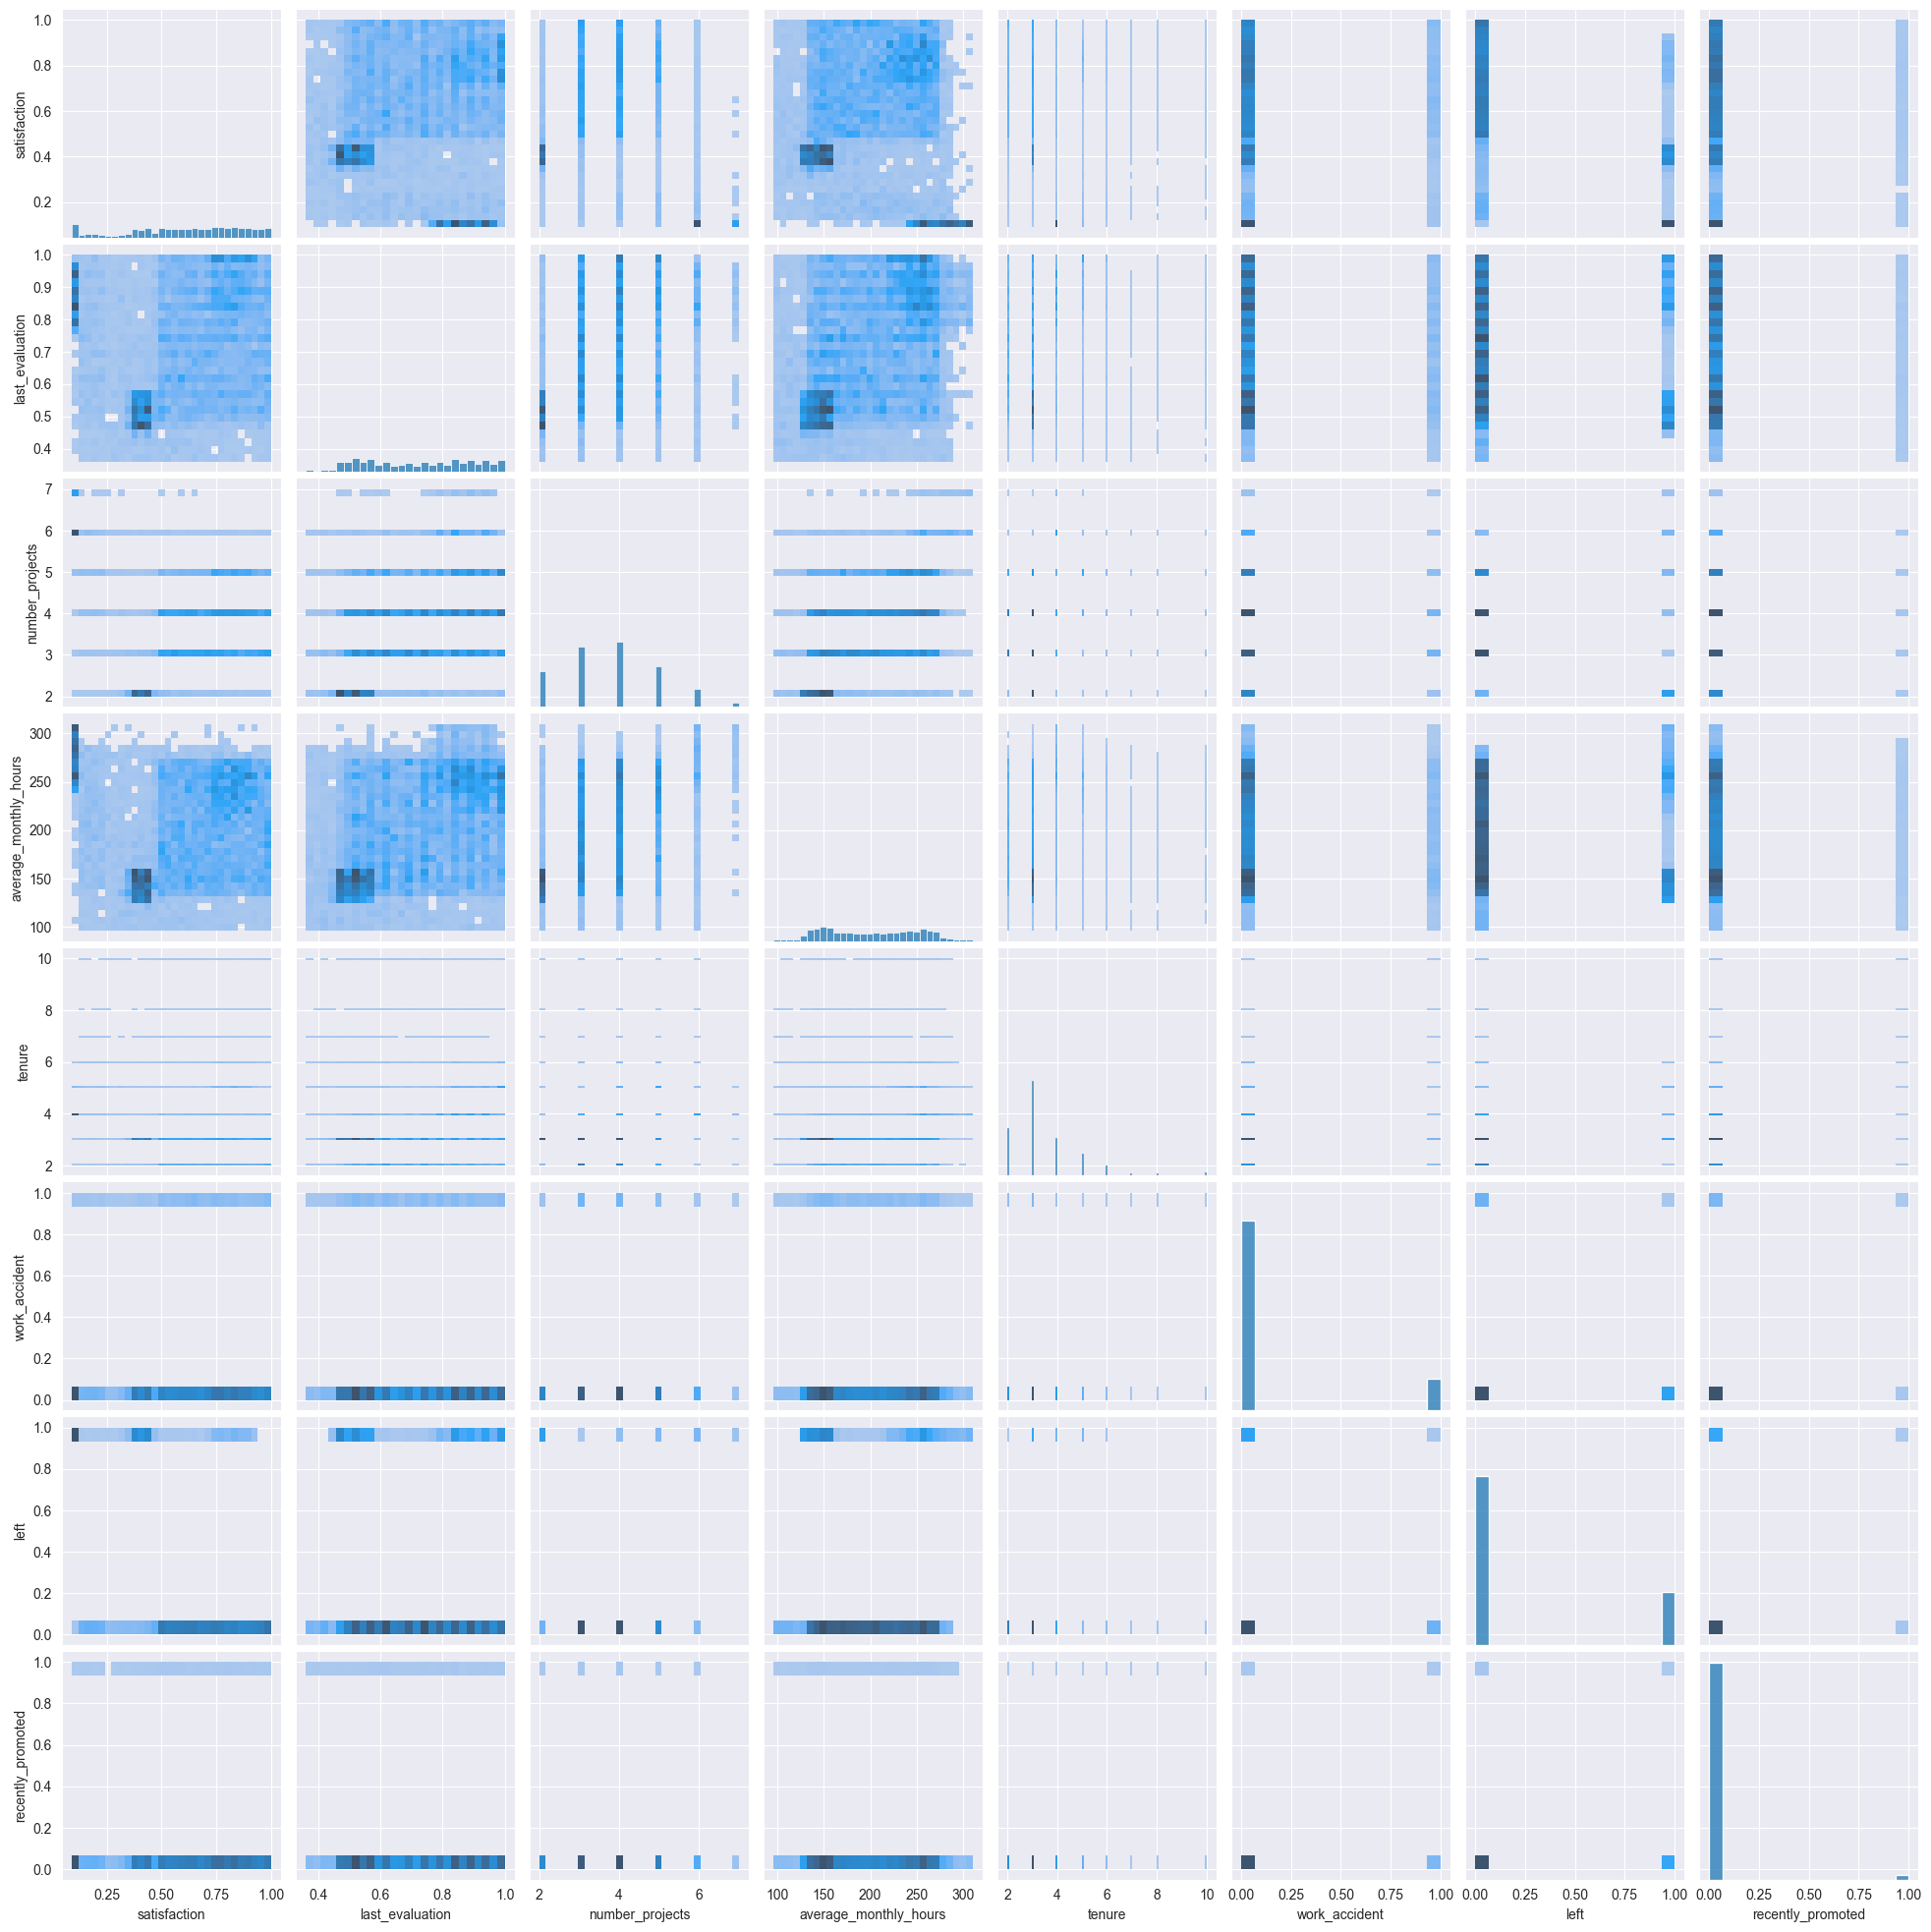

In [31]:
# A pairplot of all the variables in df0
# Using kind="hist" because the number of data entries makes it hard to determine any trends
sns.pairplot(df0, kind="hist")


### Insights

Most variables have a weak linear relationship with the outcome variable "left".
The variables that have the weakest linear relationship with left are last_evaluation, number_projects, and average_monthly_hours.

The variables with the strongest linear relationships are satisfaction, tenure, and work_accident.
satisfaction and work_accident have a negative linear relationship, which is intuitive. The chance of a satisfied employee leaving should be lower than a not-satisfied employee. 

Tenure has a positive linear relationship with left, which is also intuitive. If an employee stayed with the company for a prolonged period of time, it either means they are satisfied or they cannot leave for some other reason. Either way, the odds of them leaving decrease as tenure increases.

The variables number_projects, average_monthly_hours, and last_evaluation are co-linear. number_projects and average_monthly_hours have a correlation of 0.42 which is more promenent than any other variable combination. This is a stronger correlation than the outcome variable, "left", has with any other variable. 


In [32]:
# Data Engineering for Logistic Regression

df_lr = df0.copy()

# Logistic Regression cannot have extreme outliers
outlier_mask = make_outlier_mask(df0, ["tenure"])
df_lr = df_lr[outlier_mask["tenure"]]

# No severe multicolinearity between x variables
df_lr = df_lr.drop(["number_projects","last_evaluation"], axis=1) 
# Chose these two because they have severe multicolinearity with average_monthly_hours.

df_lr.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1282 entries, 1 to 14993
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction           1282 non-null   float64
 1   average_monthly_hours  1282 non-null   int64  
 2   tenure                 1282 non-null   int64  
 3   work_accident          1282 non-null   int64  
 4   left                   1282 non-null   int64  
 5   recently_promoted      1282 non-null   int64  
 6   department             1282 non-null   object 
 7   salary                 1282 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 90.1+ KB


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The type of prediction task is a classification prediction task. 
The outcome variable (y variable) is "left", it is boolean value represented as an integer.
This is also a supervised machine learning problem.

### Identify the types of models most appropriate for this task.

The types of models that are most appropriate are:
Logistic Regression, which is linear regression for classification problems
Decision Tree, which is not effected by extreme outliers and requires few pre-processing steps
Random Forest, which is an ensemble of decision trees made in parallel and can benafit from reduced variance.
XGBoost, like random forests but are made sequentially and can benafit from reduced variance and bias

All three can be used for prediction, and for determining insights on the data such as most influential features.

For this project I will make a XGBoost model. I think it has a better chance of producing a better model, as it doesn't have a multicolinearity assumption. It can also benafit from reduced variance and bias.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [33]:
# converting data types
df1 = pd.get_dummies(df0, columns=["salary","department"],drop_first=False)
# I want to keep the first of the categorical variable names so that 
# gathering insights from the results will be easier
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction            14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_projects         14999 non-null  int64  
 3   average_monthly_hours   14999 non-null  int64  
 4   tenure                  14999 non-null  int64  
 5   work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   recently_promoted       14999 non-null  int64  
 8   salary_high             14999 non-null  bool   
 9   salary_low              14999 non-null  bool   
 10  salary_medium           14999 non-null  bool   
 11  department_IT           14999 non-null  bool   
 12  department_RandD        14999 non-null  bool   
 13  department_accounting   14999 non-null  bool   
 14  department_hr           14999 non-null

In [34]:
# Defining target variable (y) and predictor variables X
y = df1["left"]
X = df1.drop(['left'], axis=1)

In [35]:
# Splitting the data into training sets and testing sets
# 20% testing set size, 80% training set size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 314)

In [36]:
# Defining an XGBClassifier, and setting the objective to be logistic
xgb = XGBClassifier(objective='binary:logistic', random_state=627)

In [41]:
# Defining parameters and scoring criteria for tuning
cv_params = {'max_depth': [70, 80, None],
              'min_child_weight': [1, 100, None],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [80, 100, 300],
              'subsample': [0.5, 0.7, 1],
              'colsample_bytree': [0.5, 0.7, 1]
              }

scoring = ('accuracy', 'precision', 'recall', 'f1')

In [42]:
# Defining a GridSearchCV for for grid search cross-validation
# f1 feels like a good refit metric as we don't want a super high accuracy at the 
# expense of one type of error occuring far more often than the other
xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1',
                      verbose = 1,
                      n_jobs = -1
                     )

In [43]:
%%time 

# training the model and saving it using pickle 
# (commented out after training so that future uses of this notebook can re-run all cells without retraining)

# xgb_cv = xgb_cv.fit(X_train, y_train)

# pickle.dump(xgb_cv, open('XGBoostModel.pickle', 'wb'))

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
CPU times: user 13.6 s, sys: 5.23 s, total: 18.8 s
Wall time: 14min 30s


In [44]:
with open('XGBoostModel.pickle', 'rb') as reading:
    xgb_cv = pickle.load(reading)

In [45]:
# print attributes of the resulting best estimator
print(xgb_cv.best_estimator_)
print(xgb_cv.best_params_)
print(xgb_cv.best_score_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=70, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=627, ...)
{'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 70, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1}
0.9790251740652895


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [46]:
# Get predicted values of the test set
y_pred = xgb_cv.best_estimator_.predict(X_test)

In [47]:
# Get the metrics of the test set on the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))



Accuracy:  0.9933333333333333
Precision:  0.9971751412429378
Recall:  0.9751381215469613
F1 Score:  0.9860335195530726


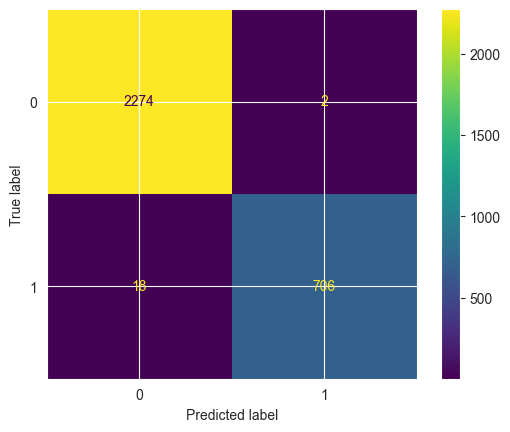

In [48]:
# Create a confusion matrix to visualize false positives, false negatives, true positives, and true negatives
cm = confusion_matrix(y_test, y_pred, labels=xgb_cv.best_estimator_.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.best_estimator_.classes_)

disp.plot()
plt.show()

In [49]:
num_left_ts = y_test.sum()
num_stayed_ts = (1-y_test).sum()

print("Testing-set positive values: ", num_left_ts)
print("Testing-set negative values: ", num_stayed_ts)

Testing-set positive values:  724
Testing-set negative values:  2276


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

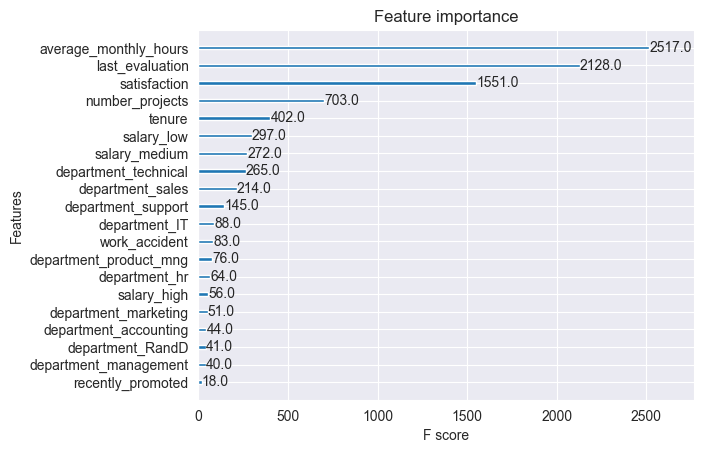

In [50]:
# Create a Feature Importance graph to determine the most important features
plot_importance(xgb_cv.best_estimator_)

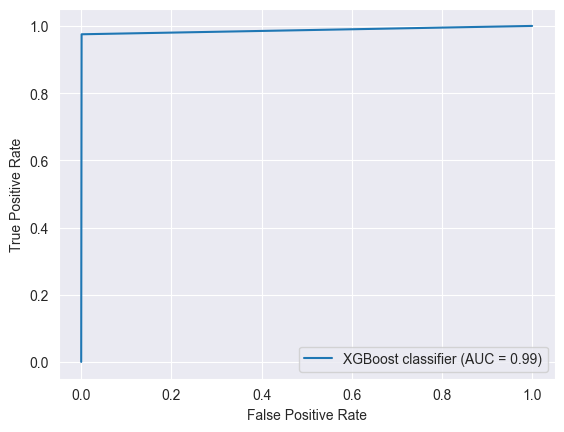

In [51]:
# Creating an ROC curve plot
fpr, tpr, thresh = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='XGBoost classifier')
display.plot()
plt.show()


### Summary of model results

The model produced the following metrics:

Accuracy:  0.9983333333333333

Precision:  1.0

Recall:  0.9930939226519337

F1 Score:  0.9965349965349966

AUC: 1.0

The testing set has a size of 3000, 724 of which being positive results (employee left)
On the testing set, the model made 5 false negative predictions, which result in the lower recall and f1 score than precision score.

The feature importance graph shows that average_monthly_hours is the most important feature for the model, while last_evaluation and satisfaction are close a close second and third.


### Conclusion, Recommendations, Next Steps

Based on these results, I would conclude that the department an employee works in doesn't really impact if they will quit or not. The company should pay special attention to the average hours, last evaluation score and self reported satisfaction level of their employees. I would recommend doing further research into these, perhaps some more extensive surveys rather than rating their satisfaction on a 0-1 scale. I would also recommend looking into why some employees have different average monthly hours than others, and how that impacts their satisfaction.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.